In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("cs-training.csv")
test_df = pd.read_csv('cs-test.csv')
data.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
test_df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
data.describe().to_csv('TrainingDataDescribe.csv')
test_df.describe().to_csv('TestDataDescribe.csv')


In [3]:
#去重，显示数据没有重复，因此不进行操作
print (data.duplicated().value_counts())
print (test_df.duplicated().value_counts())

False    150000
dtype: int64
False    101503
dtype: int64


In [4]:
#缺失值处理

In [5]:
data.isnull().sum()  #查看缺失值数目

ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [6]:
#numberofdependents的缺失情况较少，直接丢弃部分数据
data=data.dropna(subset=['NumberOfDependents'])
#至于MoneyIncome,希望使用随机森林算法，为提高准确性故将其它数据清洗后再说

In [7]:
# 用随机森林对缺失值预测填充

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

data_copy=data
#known=data_copy.notnull()
known=data_copy[data_copy.MonthlyIncome.notnull()]
unknown=data_copy[data_copy.MonthlyIncome.isnull()]
y=known['MonthlyIncome']
x=known.drop(['MonthlyIncome','DebtRatio'],axis=1)
x2=known.drop(['MonthlyIncome'],axis=1)

for i in range(100,801,100):
    rfr=RandomForestRegressor(random_state=0,n_estimators=i,n_jobs=-1,oob_score=True)
    rfr.fit(x,y)
    obb1=rfr.oob_score_
    rfr.fit(x2,y)
    obb2=rfr.oob_score_
    print("n:",i,",x1  train_obb:",obb1)
    print("n:",i,",x2  train_obb:",obb2)

KeyboardInterrupt: 

In [8]:
rfr=RandomForestRegressor(random_state=0,n_estimators=600,n_jobs=-1,oob_score=True)
rfr.fit(x,y)
prediction=rfr.predict(unknown.drop(['MonthlyIncome','DebtRatio'],axis=1))
data.isnull().sum()

ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           25807
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                          0
dtype: int64

In [9]:
data.loc[(data.MonthlyIncome.isnull()),'MonthlyIncome'] =prediction


In [10]:
data.isnull().sum()



ID                                      0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

<AxesSubplot:title={'center':'MonthlyIncome Distribution'}>

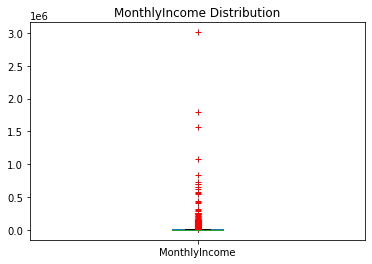

In [11]:
datatemp2=data["MonthlyIncome"]
datatemp2.plot(kind='box',title='MonthlyIncome Distribution',sym='r+')

In [12]:
data.describe()

ID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  146076.000000     146076.000000                         146076.000000   
mean    75013.668597          0.067410                              5.922272   
std     43290.647551          0.250732                            250.070774   
min         1.000000          0.000000                              0.000000   
25%     37534.750000          0.000000                              0.031018   
50%     75013.500000          0.000000                              0.158818   
75%    112496.250000          0.000000                              0.563684   
max    150000.000000          1.000000                          50708.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  146076.000000                         146076.000000  146076.000000   
mean       52.099277                              0.407945     333.373603   
std        14.604005                              4.002747    1943.906679   
min         0.000000                              0.000000       0.000000   
25%        41.000000                              0.000000       0.171764   
50%        52.000000                              0.000000       0.357751   
75%        62.000000                              0.000000       0.766117   
max       107.000000                             98.000000  329664.000000   

       MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
count   1.460760e+05                    146076.000000   
mean    6.620687e+03                         8.529279   
std     1.322211e+04                         5.149533   
min     0.000000e+00                         0.000000   
25%     3.661990e+03                         5.000000   
50%     5.515153e+03                         8.000000   
75%     8.000000e+03                        11.000000   
max     3.008750e+06                        58.000000   

       NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  \
count            146076.000000                 146076.000000   
mean                  0.250698                      1.029717   
std                   3.977197                      1.132774   
min                   0.000000                      0.000000   
25%                   0.000000                      0.000000   
50%                   0.000000                      1.000000   
75%                   0.000000                      2.000000   
max                  98.000000                     54.000000   

       NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents  
count                         146076.000000       146076.000000  
mean                               0.225027            0.757222  
std                                3.962048            1.115086  
min                                0.000000            0.000000  
25%                                0.000000            0.000000  
50%                                0.000000            0.000000  
75%                                0.000000            1.000000  
max                               98.000000           20.000000

In [13]:
test_df.isnull().sum()
#可以看到 测试集同样也有数据缺失的问题

ID                                           0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [14]:
#这里直接使用均值填充
test_df['MonthlyIncome']=test_df['MonthlyIncome'].fillna(test_df['MonthlyIncome'].mean())
test_df['NumberOfDependents']=test_df['NumberOfDependents'].fillna(test_df['NumberOfDependents'].mean())

In [15]:
test_df.isnull().sum()

ID                                           0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

In [16]:
test_df.describe()

ID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  101503.000000               0.0                         101503.000000   
mean    50752.000000               NaN                              5.310000   
std     29301.536524               NaN                            196.156039   
min         1.000000               NaN                              0.000000   
25%     25376.500000               NaN                              0.030131   
50%     50752.000000               NaN                              0.152586   
75%     76127.500000               NaN                              0.564225   
max    101503.000000               NaN                          21821.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  101503.000000                         101503.000000  101503.000000   
mean       52.405436                              0.453770     344.475020   
std        14.779756                              4.538487    1632.595231   
min        21.000000                              0.000000       0.000000   
25%        41.000000                              0.000000       0.173423   
50%        52.000000                              0.000000       0.364260   
75%        63.000000                              0.000000       0.851619   
max       104.000000                             98.000000  268326.000000   

       MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
count   1.015030e+05                    101503.000000   
mean    6.855036e+03                         8.453514   
std     3.269395e+04                         5.144100   
min     0.000000e+00                         0.000000   
25%     3.900000e+03                         5.000000   
50%     6.583000e+03                         8.000000   
75%     7.374000e+03                        11.000000   
max     7.727000e+06                        85.000000   

       NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  \
count            101503.000000                 101503.000000   
mean                  0.296691                      1.013074   
std                   4.515859                      1.110253   
min                   0.000000                      0.000000   
25%                   0.000000                      0.000000   
50%                   0.000000                      1.000000   
75%                   0.000000                      2.000000   
max                  98.000000                     37.000000   

       NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents  
count                         101503.000000       101503.000000  
mean                               0.270317            0.769046  
std                                4.503578            1.121977  
min                                0.000000            0.000000  
25%                                0.000000            0.000000  
50%                                0.000000            0.000000  
75%                                0.000000            1.000000  
max                               98.000000           43.000000

In [17]:
#对训练集进行异常值处理

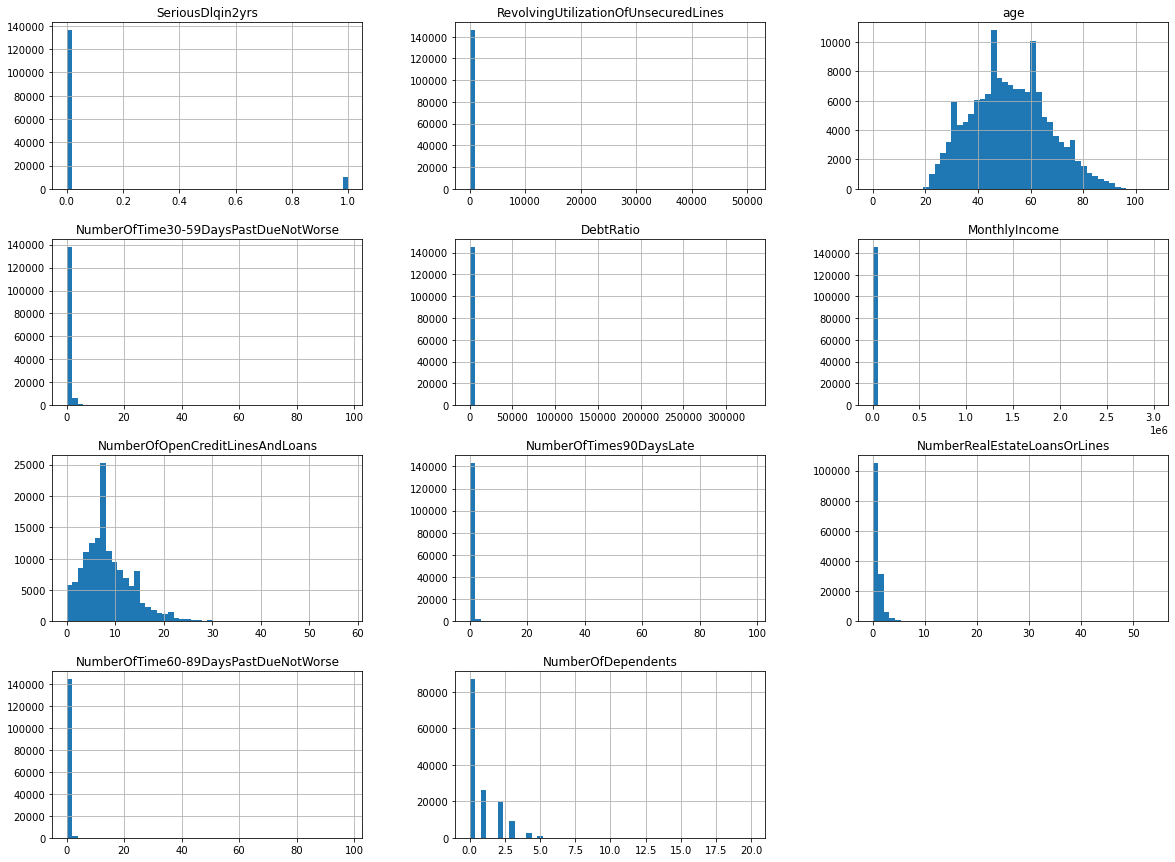

In [18]:
#作直方图
data.drop(['ID'],axis=1).hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
data=data[data['age']>0]
data=data[data['age']<150]
#这两个数据是百分比，应该是不大于一的
data=data[data['RevolvingUtilizationOfUnsecuredLines']<=1]
data=data[data['DebtRatio']<=1]
data[data['MonthlyIncome'] > 50000].shape 
data = data[data['MonthlyIncome'] < 50000]

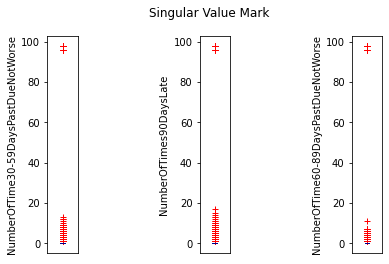

In [20]:
#作箱线图
fig,axes = plt.subplots(1,3)
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
              medians='DarkBlue', caps='Red')
# boxes表示箱体，whisker表示触须线
# medians表示中位数，caps表示最大与最小值界限
axes[0].set_ylabel('NumberOfTime30-59DaysPastDueNotWorse')
axes[1].set_ylabel('NumberOfTimes90DaysLate')
axes[2].set_ylabel('NumberOfTime60-89DaysPastDueNotWorse')

datatemp1=data[["NumberOfTime30-59DaysPastDueNotWorse","NumberOfTimes90DaysLate","NumberOfTime60-89DaysPastDueNotWorse"]]
datatemp1.plot(kind='box',subplots=True,title='Singular Value Mark',color=color,sym='r+',ax=axes,xticks=[])
# sym参数表示异常值标记的方式
 


fig.subplots_adjust(wspace=4,hspace=1)  # 调整子图之间的间距


In [21]:
#查看部分特征的异常值个数
data.loc[data['NumberRealEstateLoansOrLines'] >50]

Empty DataFrame
Columns: [ID, SeriousDlqin2yrs, RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime30-59DaysPastDueNotWorse, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents]
Index: []

In [22]:
data.loc[data['NumberOfDependents'] >15]

ID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
6299  6300                 0                              0.226616   40   

      NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
6299                                     1   0.576539         6316.0   

      NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
6299                               11                        2   

      NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
6299                             1                                     0   

      NumberOfDependents  
6299                20.0

In [23]:
#剔除异常值
data = data[data['NumberOfTime30-59DaysPastDueNotWorse'] < 90]
data = data[data['NumberOfTime60-89DaysPastDueNotWorse'] < 90]
data = data[data['NumberOfTimes90DaysLate'] < 90]
data = data[data['NumberRealEstateLoansOrLines'] <50]
data = data[data['NumberOfDependents'] <15]

In [24]:
data.describe()

ID  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  111251.000000     111251.000000                         111251.000000   
mean    75023.200780          0.059613                              0.311408   
std     43315.926936          0.236769                              0.336543   
min         1.000000          0.000000                              0.000000   
25%     37650.500000          0.000000                              0.031614   
50%     74934.000000          0.000000                              0.160404   
75%    112564.500000          0.000000                              0.532874   
max    150000.000000          1.000000                              1.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  111251.000000                         111251.000000  111251.000000   
mean       51.631599                              0.236223       0.304326   
std        14.554592                              0.671782       0.224929   
min        21.000000                              0.000000       0.000000   
25%        41.000000                              0.000000       0.129616   
50%        51.000000                              0.000000       0.276408   
75%        62.000000                              0.000000       0.438718   
max       103.000000                             13.000000       1.000000   

       MonthlyIncome  NumberOfOpenCreditLinesAndLoans  \
count  111251.000000                    111251.000000   
mean     6626.356021                         8.654718   
std      4538.940688                         5.145009   
min         0.000000                         0.000000   
25%      3652.000000                         5.000000   
50%      5588.000000                         8.000000   
75%      8397.500000                        11.000000   
max     49750.000000                        57.000000   

       NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  \
count            111251.000000                 111251.000000   
mean                  0.078390                      1.009645   
std                   0.435125                      1.070808   
min                   0.000000                      0.000000   
25%                   0.000000                      0.000000   
50%                   0.000000                      1.000000   
75%                   0.000000                      2.000000   
max                  17.000000                     26.000000   

       NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents  
count                         111251.000000       111251.000000  
mean                               0.057599            0.841062  
std                                0.301828            1.141706  
min                                0.000000            0.000000  
25%                                0.000000            0.000000  
50%                                0.000000            0.000000  
75%                                0.000000            1.000000  
max                               11.000000           13.000000

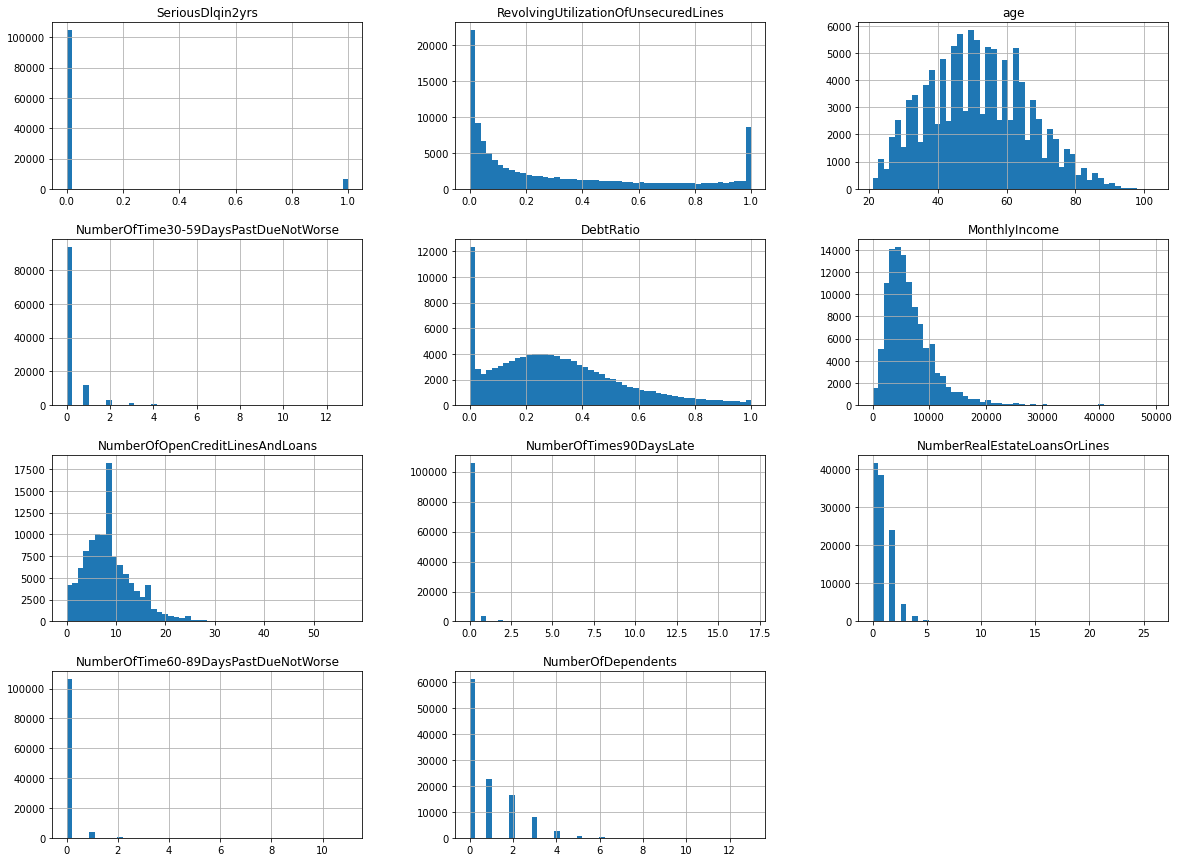

In [25]:
#作直方图
data.drop(['ID'],axis=1).hist(bins=50, figsize=(20,15))
plt.show()

In [26]:
data.to_csv('fulldata.csv',index=False)
test_df.to_csv('test.csv',index=False)